In [ ]:
from skimage import io
import os

from storm.pp import Cal_CMatrix
img_path='../Visium_Human_Breast_Cancer/spatial/tissue_hires_image.png'
cmtx = Cal_CMatrix()
cmtx.readFile(img_path)
print(cmtx.get_cmtx())

[[0.61761813 0.7448854  0.25237589]
 [0.56089075 0.61443608 0.55486023]]


In [ ]:
from storm.VisiumReader import VisiumReader
from storm.pp import VisiumPreprocesser
Reader=VisiumReader()
Reader.read_all(folder_path="../Visium_Human_Breast_Cancer",gene_token="../gene_token_homologs.csv",method="binary",key="symbol")
processer=VisiumPreprocesser(Reader,224)
processer.process_tpl()
processer.round_spot()
processer.generate_grid()
processer.map_tissue()
processer.process_adata()
print(processer.fnl_adata)

C:\Users\Dai\anaconda3\envs\djt\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Dai\anaconda3\envs\djt\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


gene id matches:
human:15597 
mouse:16


C:\Users\Dai\Desktop\STORM-release-master\storm\preprocess\VisiumPreprocesser.py:261: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.array_forBarcode = expand_labels(self.array_forBarcode, distance=int(self.dia // 4))


3839


AnnData object with n_obs × n_vars = 50686 × 15757
    var: 'gene_ids_x', 'feature_types', 'genome', 'symbol_x', 'gene_ids_y', 'symbol_y'


C:\Users\Dai\anaconda3\envs\djt\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Dai\anaconda3\envs\djt\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


gene id matches:
human:15597 
mouse:16


C:\Users\Dai\Desktop\STORM-release-master\storm\preprocess\VisiumPreprocesser.py:261: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.array_forBarcode = expand_labels(self.array_forBarcode, distance=int(self.dia // 4))


                    in_tissue  spot_y  spot_x  pxl_y_fullres  pxl_x_fullres  \
barcode                                                                       
ACGCCTGACACGCGCT-1        1.0     0.0     0.0         4650.0        12203.0   
TACCGATCCAACACTT-1        1.0     1.0     1.0         4887.0        12338.0   
ATTAAAGCGGACGAGC-1        1.0     0.0     2.0         4651.0        12475.0   
GATAAGGGACGATTAG-1        1.0     1.0     3.0         4888.0        12609.0   
GTGCAAATCACCAATA-1        1.0     0.0     4.0         4653.0        12747.0   

                    pxl_y_hires  pxl_x_hires  \
barcode                                        
ACGCCTGACACGCGCT-1   223.708264   587.077837   
TACCGATCCAACACTT-1   235.110169   593.572593   
ATTAAAGCGGACGAGC-1   223.756373   600.163567   
GATAAGGGACGATTAG-1   235.158278   606.610214   
GTGCAAATCACCAATA-1   223.852592   613.249298   

                                            top_left_before top_left_after  
barcode                         

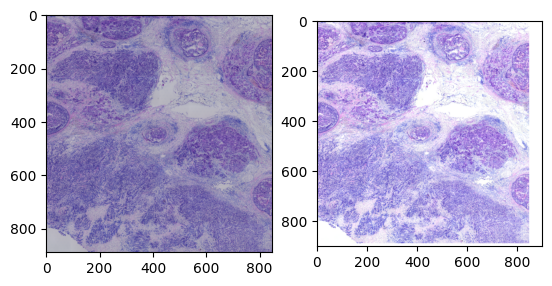

In [ ]:
from storm.VisiumReader import VisiumReader
from storm.pp import VisiumPreprocesser
import matplotlib.pyplot as plt

Reader=VisiumReader()
Reader.read_all(folder_path="../Visium_Human_Breast_Cancer",gene_token="../gene_token_homologs.csv",method="binary",key="symbol")

processer=VisiumPreprocesser(Reader,224)
_,_,_,_,raw_crop_he,crop_he=processer.process_img()
fig,axs=plt.subplots(1,2)
axs[0].imshow(raw_crop_he)
axs[1].imshow(crop_he)

print(processer.tissue_position_list.head(5),processer.final_tpl.head(5),processer.tissue_grid.head(5))

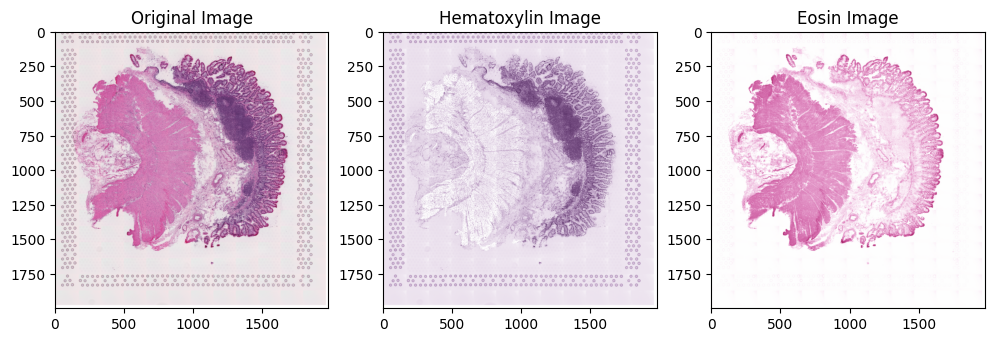

In [ ]:
from storm.pp import exc_he,Cal_CMatrix
import matplotlib.pyplot as plt
from skimage import io
import os
img_path = '../hm0477/spatial/tissue_hires_image.png'
cmtx = Cal_CMatrix()
cmtx.readFile(img_path)
stain_matrix =cmtx.get_cmtx()
img = io.imread(img_path)
h_image, e_image = exc_he(img, stain_matrix)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(h_image)
ax[1].set_title('Hematoxylin Image')
ax[2].imshow(e_image)
ax[2].set_title('Eosin Image')
plt.show()

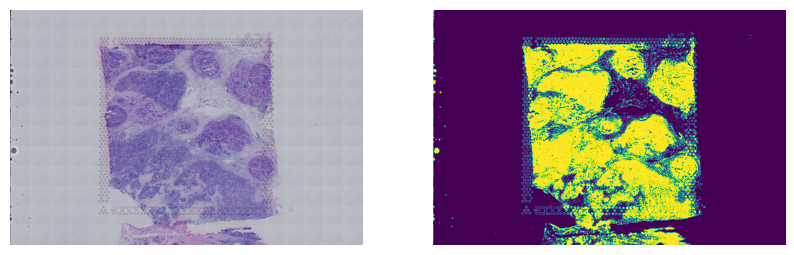

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
from storm.pp import exc_tissue
img = io.imread('../Visium_Human_Breast_Cancer/spatial/tissue_hires_image.png')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].axis('off')
mask=exc_tissue(img,method='otsu')
axes[1].imshow(mask)
axes[1].axis('off')
plt.show()

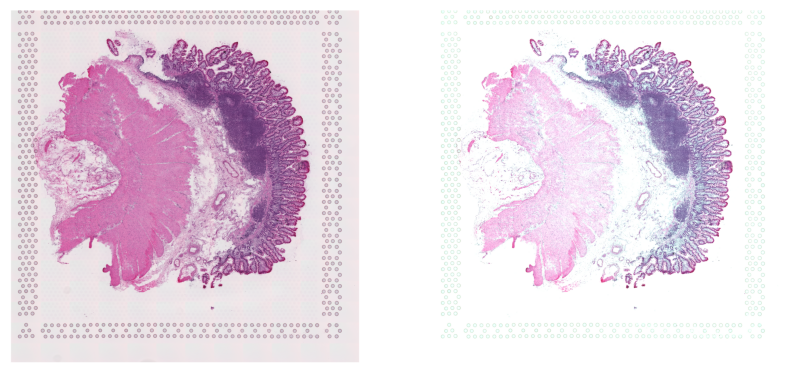

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
from storm.pp import white_balance_using_white_point,exc_tissue
img = io.imread('../hm0477/spatial/tissue_hires_image.png')
mask=exc_tissue(img,method='otsu')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].axis('off')
img_balanced=white_balance_using_white_point(img,mask)
axes[1].imshow(img_balanced)
axes[1].axis('off')
plt.show()